# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [1]:
! git clone https://github.com/conorgibbons147/linearModels.git

Cloning into 'linearModels'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 51 (delta 11), reused 5 (delta 5), pack-reused 33 (from 1)
Receiving objects: 100% (51/51), 3.73 MiB | 11.74 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('linearModels/lab/data/cars_hw.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [36]:
print(df.isnull().sum())
print(df.describe())
print(df['Make'].unique())

Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963115  41571.195697          5.095287  7.410195e+05
std    281.891232     2.818742  24390.995134          0.446224  3.673234e+05
min      1.000000  2011.000000   1117.000000          4.000000  1.880000e+05
25%    244.750000  2015.000000  22676.750000          5.000000  4.757500e+05
50%    488.500000  2017.000000  37570.500000          5.000000  6.665000e+05
75%    732.250000  2019.000000  57421.250000          5.000000  8.830000e+05
max    976.000000  2022.000000  99495.000000          8.000000  2.941000e+06
['Volkswagen' 'Hyu

In [37]:
df.drop(columns='Unnamed: 0', inplace=True)

In [38]:
df['No_of_Owners'] = df['No_of_Owners'].str.replace('st', '').str.replace('nd', '').str.replace('rd', '')

<Axes: xlabel='Price', ylabel='Count'>

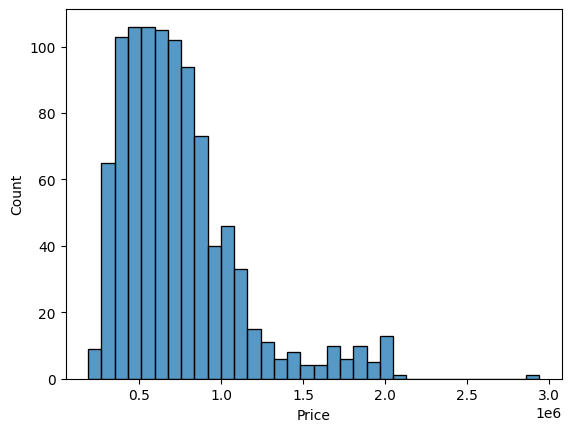

In [39]:
sns.histplot(df['Price'])

<Axes: xlabel='Mileage_Run', ylabel='Count'>

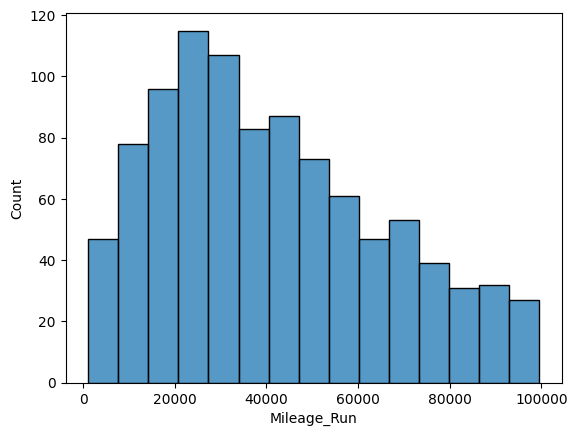

In [40]:
sns.histplot(df['Mileage_Run'])

<Axes: xlabel='Mileage_Run', ylabel='Price'>

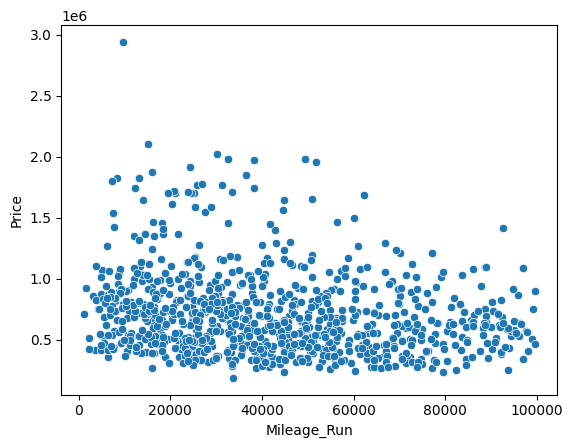

In [41]:
sns.scatterplot(data=df, x='Mileage_Run', y='Price')

<Axes: xlabel='Body_Type', ylabel='count'>

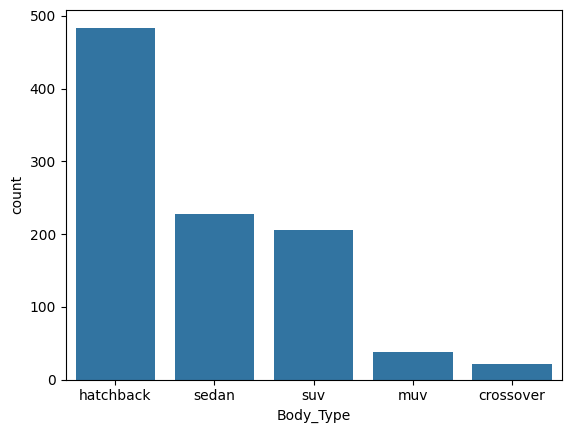

In [42]:
sns.countplot(data=df, x='Body_Type', order=df['Body_Type'].value_counts().index)

In [44]:
# one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [46]:
# split data
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64926)

In [47]:
from sklearn.linear_model import LinearRegression

In [51]:
# Model 1
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_1 = model_1.predict(X_train)
y_test_pred_1 = model_1.predict(X_test)

In [52]:
# Model 2
X_train_2 = X_train[['Make_Year', 'Mileage_Run']]
X_test_2 = X_test[['Make_Year', 'Mileage_Run']]

# Fit the model
model_simple = LinearRegression()
model_simple.fit(X_train_2, y_train)

# Predict and evaluate
y_train_pred_2 = model_simple.predict(X_train_2)
y_test_pred_2 = model_simple.predict(X_test_2)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_train_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
rmse_test_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
r2_train_1 = r2_score(y_train, y_train_pred_1)
r2_test_1 = r2_score(y_test, y_test_pred_1)


rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
r2_train_2 = r2_score(y_train, y_train_pred_2)
r2_test_2 = r2_score(y_test, y_test_pred_2)

In [58]:
print('Model 1:')
print('Test RMSE:', rmse_test_1)
print('Test R2:', r2_test_1)
print('Train RMSE:', rmse_train_1)
print('Train R2:', r2_train_1)
print('-----------------------------------')
print('Model 2:')
print('Test RMSE:', rmse_test_2)
print('Test R2:', r2_test_2)
print('Train RMSE:', rmse_train_2)
print('Train R2:', r2_train_2)

# Model 1 seems to do much better than model 2

Model 1:
Test RMSE: 163275.39845448456
Test R2: 0.7661656046401091
Train RMSE: 137949.8023694724
Train R2: 0.8637199669071309
-----------------------------------
Model 2:
Test RMSE: 278039.264066628
Test R2: 0.32192278827310594
Train RMSE: 311985.92216782353
Train R2: 0.3029562131854928


Partial R²: 0.5153786354683791


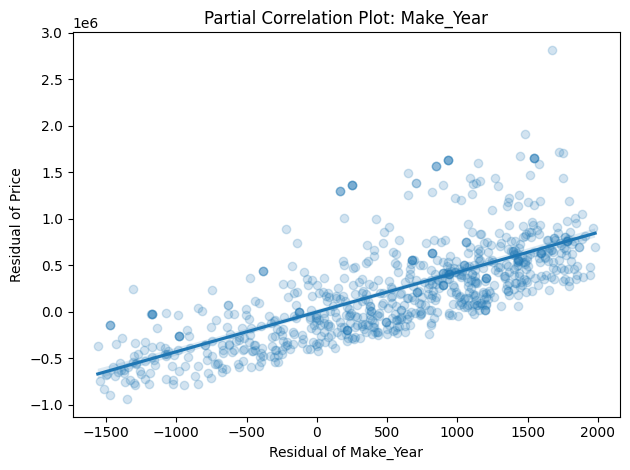

Partial R²: 0.03173370656016883


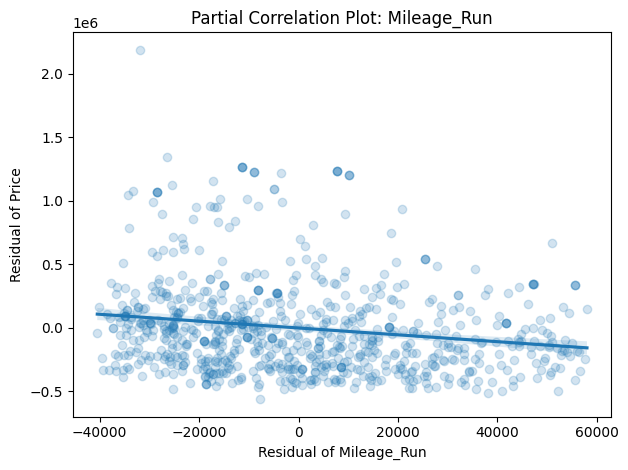

In [60]:
def partial_plot(X, y, var):
    x_k = X[var]
    X_mk = X.drop(columns=[var])

    reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y)
    r_y = y - reg_y.predict(X_mk)

    reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k)
    r_x = x_k - reg_k.predict(X_mk)

    reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1), r_y.to_numpy())
    partial_r2 = reg.score(r_x.to_numpy().reshape(-1, 1), r_y.to_numpy())
    print('Partial R²:', partial_r2)

    sns.regplot(x=r_x, y=r_y, scatter_kws={'alpha': 0.2})
    plt.title(f'Partial Correlation Plot: {var}')
    plt.xlabel(f'Residual of {var}')
    plt.ylabel('Residual of Price')
    plt.tight_layout()
    plt.show()

partial_plot(X_train_2, y_train, 'Make_Year')
partial_plot(X_train_2, y_train, 'Mileage_Run')

In [63]:
X_train_complex = X_train_2.copy()
X_test_complex = X_test_2.copy()

# log mileage
X_train_complex['log_mileage'] = np.log(X_train_complex['Mileage_Run'] + 1)
X_test_complex['log_mileage'] = np.log(X_test_complex['Mileage_Run'] + 1)

# Interaction between year and mileage
X_train_complex['Make_Year*Mileage_Run'] = X_train_complex['Make_Year'] * X_train_complex['Mileage_Run']
X_test_complex['Make_Year*Mileage_Run'] = X_test_complex['Make_Year'] * X_test_complex['Mileage_Run']

# fit model
model_complex = LinearRegression()
model_complex.fit(X_train_complex, y_train)

# predict
y_train_pred_c = model_complex.predict(X_train_complex)
y_test_pred_c = model_complex.predict(X_test_complex)

rmse_train_c = np.sqrt(mean_squared_error(y_train, y_train_pred_c))
rmse_test_c = np.sqrt(mean_squared_error(y_test, y_test_pred_c))
r2_train_c = r2_score(y_train, y_train_pred_c)
r2_test_c = r2_score(y_test, y_test_pred_c)

# Print results
print('Model 3')
print('Train RMSE:', rmse_train_c)
print('Train R2:', r2_train_c)
print('Test RMSE:', rmse_test_c)
print('Test R2:', r2_test_c)

# This model honestly isn't performing as well as the model 1 with every variable

Model 3
Train RMSE: 308571.7185422427
Train R2: 0.3181288691899121
Test RMSE: 275500.2067482037
Test R2: 0.3342506566218173


The model 2 underfit the data, while the full model 1 performed well without overfitting. Adding transformations and interactions improved the model 2 but it still didn’t outperform 1. This shows the importance of including enough important features withpout adding unnecessary complexity.